<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_5_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Demonstration 5.2.4 Applying isolation forest methodologies

Ronald Fisher (1936), a British statistician and biologist, published the Iris data set as an example of linear discriminant analysis. The original data set consists of 150 observations of iris flowers from three different species (*Iris setosa*, *Iris virginica*, and *Iris versicolor*). Each observation includes four features (length and width of the sepals and petals) and the iris species.

The Iris data set is widely used for educational purposes in statistical classification techniques and pattern recognition methods, as it provides a fundamental example of a multivariate data set with quantitative attributes that can be used to demonstrate the principles of various ML algorithms.

Follow the demonstration to implement anomaly detection with isolation forest methodologies based on the Iris data set. You’ll learn about the benefits of analysing unlabelled data and identifying and interpreting anomalies.

In [ ]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest


# Mute warnings.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the Iris data set.
iris = load_iris()

# Specify the variables.
X = iris.data[:, :2]
y = iris.target

# Create DataFrame for convenience.
df = pd.DataFrame(X, columns=['Sepal length', 'Sepal width'])

# View the output.
df

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
# Initialize and fit Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
scores_pred = iso_forest.decision_function(X)
print(scores_pred)

[ 0.13261378  0.11671889  0.07800159  0.03932304  0.09413218  0.05383941
  0.03400715  0.14498919 -0.0117331   0.11251262  0.06729006  0.09804773
  0.10482314 -0.01984496 -0.03536209 -0.1238516   0.05383941  0.13261378
  0.02458214  0.07451672  0.12622897  0.08026544 -0.01406114  0.12574727
  0.09804773  0.11627603  0.14498919  0.10717792  0.12636663  0.07800159
  0.08691226  0.12622897 -0.03414138 -0.05897     0.11251262  0.12589312
  0.08254363  0.0695619   0.02944036  0.14708837  0.12805751 -0.07299017
  0.00019933  0.12805751  0.07451672  0.10482314  0.07451672  0.0653875
  0.05103089  0.12653524  0.08273456  0.12902487  0.10943833  0.05624292
  0.127904    0.14856107  0.10939821  0.03841844  0.11611015  0.06166275
 -0.10123756  0.14514254  0.01748882  0.15122453  0.13618144  0.12829755
  0.14861277  0.14361789 -0.00894106  0.10700261  0.0959645   0.15256616
  0.09187005  0.15256616  0.14483152  0.14062696  0.0876097   0.14174006
  0.14314168  0.12269131  0.09251016  0.09251016  0.

In [ ]:
# Predict the anomalies (1 for not anomaly, -1 for anomaly).
y_pred = iso_forest.predict(X)

# View output.
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
#lets also add the class value, which will aid in the visualization
df['class'] = y

# Add anomaly column to DataFrame.
df['anomaly'] = y_pred

# View output.
df

,Sepal length,Sepal width,class,anomaly
0,5.1,3.5,0,1
1,4.9,3.0,0,1
2,4.7,3.2,0,1
3,4.6,3.1,0,1
4,5.0,3.6,0,1
...,...,...,...,...
145,6.7,3.0,2,1
146,6.3,2.5,2,1
147,6.5,3.0,2,1
148,6.2,3.4,2,1


In [ ]:
# Display anomalies in the DataFrame.
only_anomalies = df[df.anomaly == -1]

# View output.
print(only_anomalies.shape)
only_anomalies

(15, 4)


,Sepal length,Sepal width,class,anomaly
8,4.4,2.9,0,-1
13,4.3,3.0,0,-1
14,5.8,4.0,0,-1
15,5.7,4.4,0,-1
22,4.6,3.6,0,-1
32,5.2,4.1,0,-1
33,5.5,4.2,0,-1
41,4.5,2.3,0,-1
60,5.0,2.0,1,-1
68,6.2,2.2,1,-1


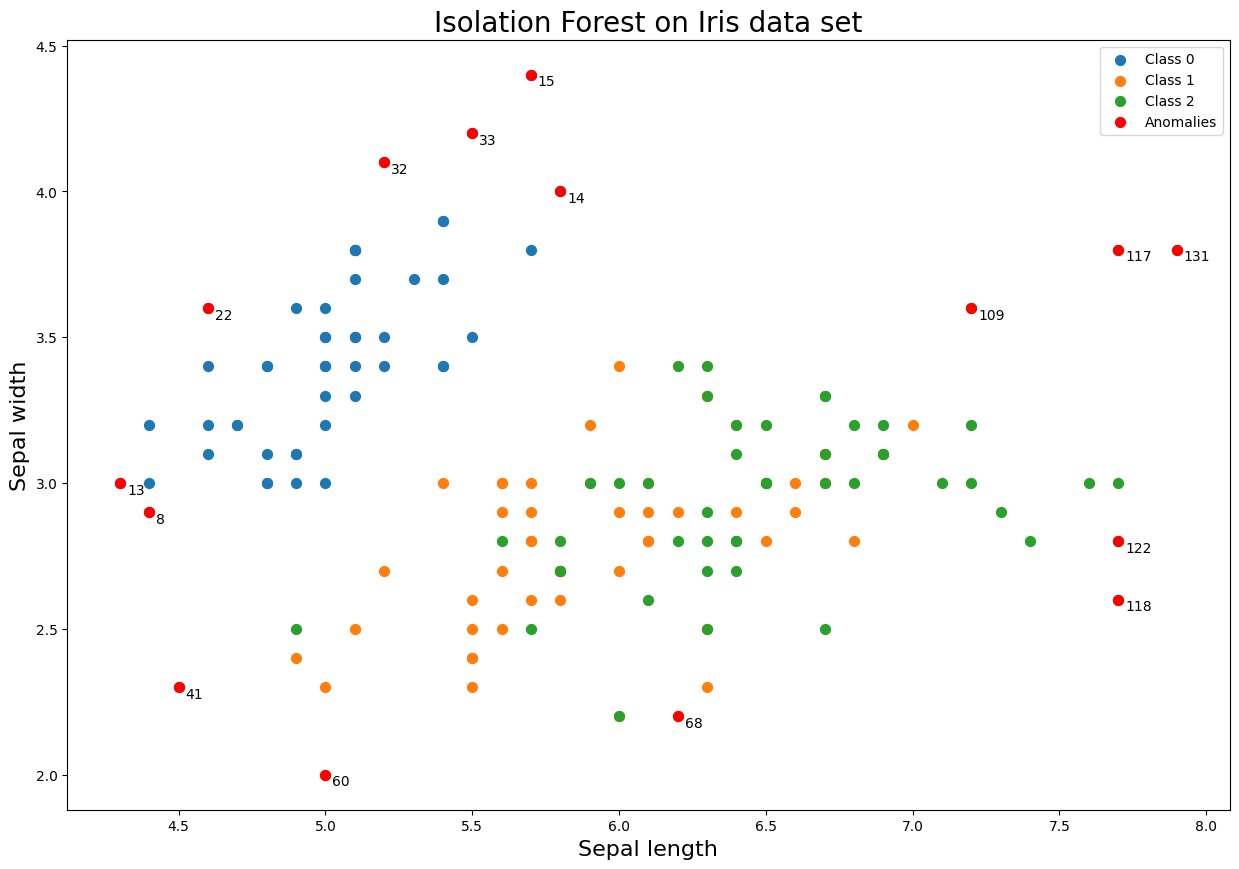

In [ ]:
# Visualise the data points.
plt.figure(figsize=(15, 10))

# Plot each class separately.
# Iris data set has three classes: 0, 1, 2
for class_value in range(3):
    plt.scatter(df[df['class'] == class_value].iloc[:, 0],
                df[df['class'] == class_value].iloc[:, 1],
                label=f'Class {class_value}',
                cmap='viridis',
                s=50)

# Highlight anomalies.
plt.scatter(df[df.anomaly == -1].iloc[:, 0],
            df[df.anomaly == -1].iloc[:, 1],
            c='red', s=50, label='Anomalies')

# Add labels for anomalies.
for i in only_anomalies.index:
    plt.annotate(i, (X[i, 0], X[i, 1]),
                 textcoords="offset points",
                 xytext=(5, -5),
                 ha='left', va='center')

# Add title, labels, and legend.
plt.title("Isolation Forest on Iris data set", fontsize=20)
plt.xlabel('Sepal length', fontsize=16)
plt.ylabel('Sepal width', fontsize=16)
plt.legend()

# View plot.
plt.show()

### Parameter tuning

In [ ]:
# Create DataFrame for convenience.
df = pd.DataFrame(X, columns=['Sepal length', 'Sepal width'])

# Initialize and fit Isolation Forest - change contamination
iso_forest = IsolationForest(n_estimators=100, contamination=0.2, random_state=42)
iso_forest.fit(X)

# Predict the anomalies (1 for not anomaly, -1 for anomaly).
y_pred = iso_forest.predict(X)


In [ ]:
#lets also add the class value, which will aid in the visualization
df['class'] = y

# Add anomaly column to DataFrame.
df['anomaly'] = y_pred


In [ ]:
# Display anomalies in the DataFrame.
only_anomalies = df[df.anomaly == -1]

# View output.
print(only_anomalies.shape)
only_anomalies

(30, 4)


,Sepal length,Sepal width,class,anomaly
3,4.6,3.1,0,-1
6,4.6,3.4,0,-1
8,4.4,2.9,0,-1
13,4.3,3.0,0,-1
14,5.8,4.0,0,-1
15,5.7,4.4,0,-1
18,5.7,3.8,0,-1
22,4.6,3.6,0,-1
32,5.2,4.1,0,-1
33,5.5,4.2,0,-1


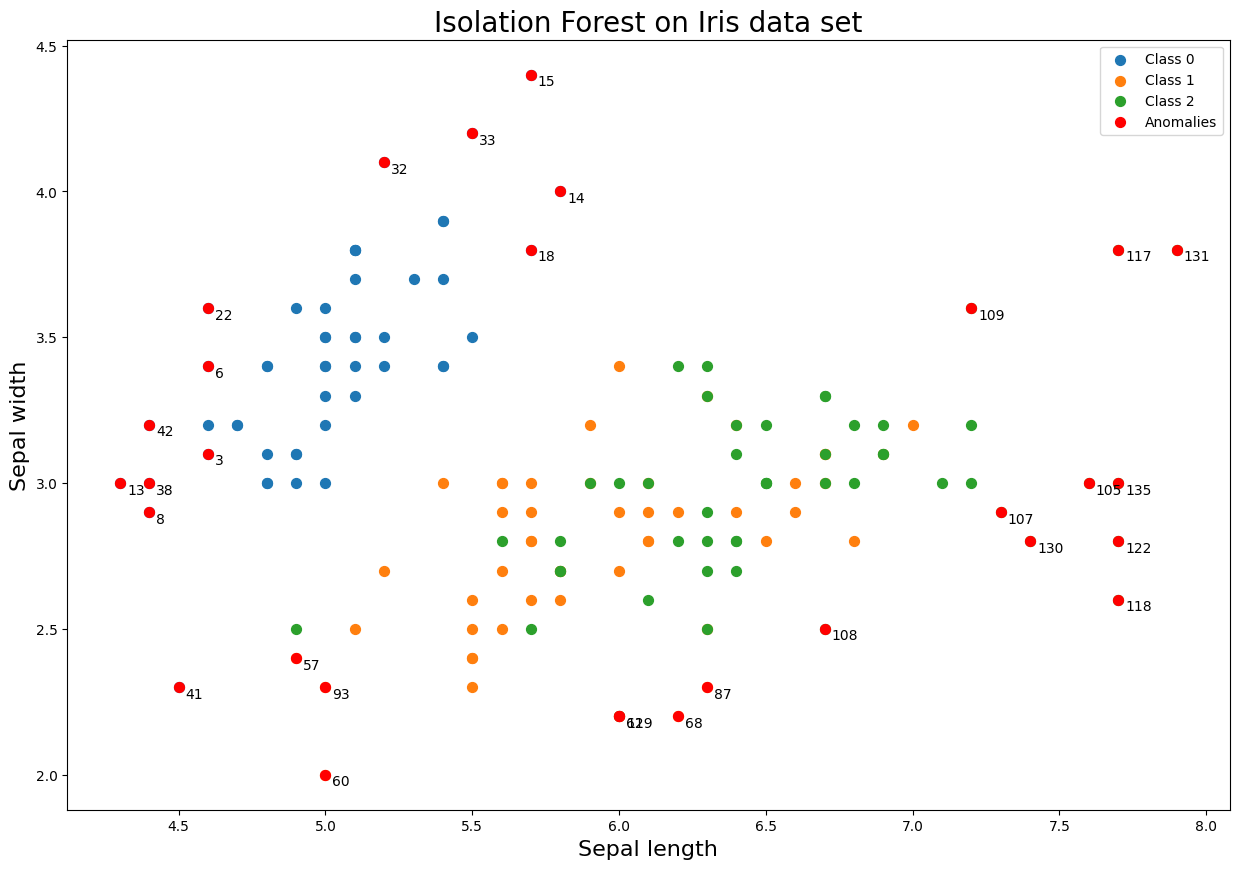

In [ ]:
# Visualise the data points.
plt.figure(figsize=(15, 10))

# Plot each class separately.
# Iris data set has three classes: 0, 1, 2
for class_value in range(3):
    plt.scatter(df[df['class'] == class_value].iloc[:, 0],
                df[df['class'] == class_value].iloc[:, 1],
                label=f'Class {class_value}',
                cmap='viridis',
                s=50)

# Highlight anomalies.
plt.scatter(df[df.anomaly == -1].iloc[:, 0],
            df[df.anomaly == -1].iloc[:, 1],
            c='red', s=50, label='Anomalies')

# Add labels for anomalies.
for i in only_anomalies.index:
    plt.annotate(i, (X[i, 0], X[i, 1]),
                 textcoords="offset points",
                 xytext=(5, -5),
                 ha='left', va='center')

# Add title, labels, and legend.
plt.title("Isolation Forest on Iris data set", fontsize=20)
plt.xlabel('Sepal length', fontsize=16)
plt.ylabel('Sepal width', fontsize=16)
plt.legend()

# View plot.
plt.show()

# Key information
This demonstration illustrated the importance of identifying and interpreting anomalies. You explored how to apply isolation forest methodologies as an unsupervised ML algorith for anomaly detection.

## Reflect
What are the pracitical applications of this technique?

> Select the pen from the toolbar to add your entry.